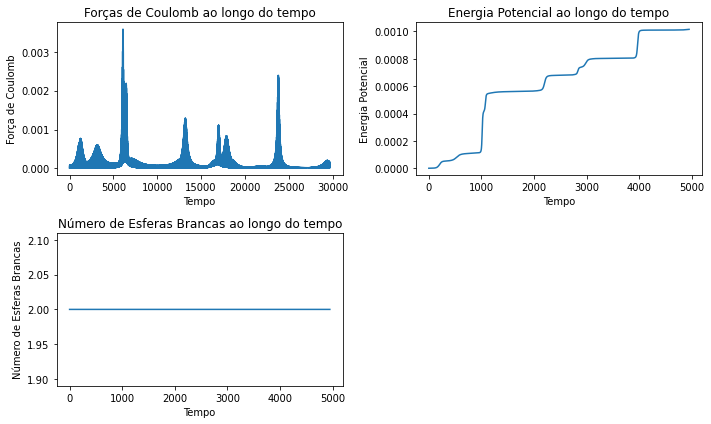

In [10]:
import pygame
import random
import matplotlib.pyplot as plt


# Definir as dimensões da caixa
width = 800
height = 600

# Definir as cores
black = (0, 0, 0)
red = (255, 0, 0)
white = (255, 255, 255)
blue = (0, 0, 255)

class Sphere:
    def __init__(self, radius, x, y, color):
        # Inicializa os atributos da esfera
        self.radius = radius   # Raio da esfera
        self.x = x             # Posição x inicial da esfera
        self.y = y             # Posição y inicial da esfera
        self.speed_x = random.uniform(-0.3, 0.3)  # Velocidade x aleatória entre -0.5 e 0.5
        self.speed_y = random.uniform(-0.3, 0.3)  # Velocidade y aleatória entre -0.5 e 0.5
        self.color = color

    def check_collision(self, other_sphere):
        # Retorna True se houver colisão com outra esfera, False caso contrário
        distance = ((self.x - other_sphere.x) ** 2 + (self.y - other_sphere.y) ** 2) ** 0.5
        return distance < self.radius + other_sphere.radius

    def check_reaction(self, other_sphere):
        # Verificar se a esfera atual é a vermelha e as outras são brancas
        if self.color == red and other_sphere.color == white:
            # Contar quantas esferas brancas a vermelha colidiu
            count_white_spheres = sum(1 for sphere in spheres if sphere.color == white and sphere.check_collision(self))
            if count_white_spheres >= 2:
                # Se a esfera vermelha colidir com duas esferas brancas, ela vira azul (água)
                self.color = blue
                self.radius = 40  # Aumenta o raio para representar a esfera de água
                self.speed_x = 0  # A água não se move
                self.speed_y = 0

                # Remover as duas esferas brancas que reagiram com a esfera vermelha
                for sphere in spheres[:]:
                    if sphere.color == white and sphere.check_collision(self):
                        spheres.remove(sphere)

    def update(self):
        # Atualiza a posição da esfera com base na velocidade atual
        self.x += self.speed_x
        self.y += self.speed_y

        # Aplicar força de atração entre as esferas
        for other_sphere in spheres:
            if other_sphere != self:
                dx = other_sphere.x - self.x
                dy = other_sphere.y - self.y
                distance_squared = dx**2 + dy**2
                if distance_squared > 0:
                    force = 0.1 / distance_squared  # Força de atração inversamente proporcional à distância ao quadrado
                    self.speed_x += force * dx
                    self.speed_y += force * dy

        # Verifica colisões com as bordas da caixa
        if self.x - self.radius < 0 or self.x + self.radius > width:
            # Inverte a direção da velocidade no eixo x se a esfera atingir uma borda horizontal
            self.speed_x = -self.speed_x
        if self.y - self.radius < 0 or self.y + self.radius > height:
            # Inverte a direção da velocidade no eixo y se a esfera atingir uma borda vertical
            self.speed_y = -self.speed_y

        # Verificar reação química com outras esferas
        for other_sphere in spheres:
            if other_sphere != self:
                self.check_reaction(other_sphere)

    def draw(self, screen):
        # Desenha a esfera na tela
        pygame.draw.circle(screen, self.color, (int(self.x), int(self.y)), self.radius)


# Inicializar o Pygame
pygame.init()

# Criar a janela
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Molecular Dynamics Simulation")

# Definir a quantidade de esferas de oxigênio e hidrogênio
num_oxygen = 1
num_hydrogen = 2

# Criar uma lista para armazenar as esferas
spheres = []
for _ in range(num_oxygen):
    spheres.append(Sphere(radius=30, x=random.randint(30, width - 30), y=random.randint(30, height - 30), color=red))
for _ in range(num_hydrogen):
    spheres.append(Sphere(radius=20, x=random.randint(20, width - 20), y=random.randint(20, height - 20), color=white))

# Listas para armazenar os dados dos gráficos
forces_coulomb = []
potential_energy = []
num_white_spheres = []

# Loop principal do jogo
running = True
while running:
    # Verificar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            # Encerra o loop principal e o jogo quando o jogador fecha a janela
            running = False

    # Atualizar todas as esferas
    for sphere in spheres:
        sphere.update()

        # Calcular e armazenar a força de Coulomb entre as esferas
        for other_sphere in spheres:
            if other_sphere != sphere:
                dx = other_sphere.x - sphere.x
                dy = other_sphere.y - sphere.y
                distance_squared = dx ** 2 + dy ** 2
                force_coulomb = 1 / distance_squared  # Simplificação da força de Coulomb
                forces_coulomb.append(force_coulomb)

    # Calcular e armazenar a energia potencial total do sistema
    total_energy = sum(0.5 * force_coulomb ** 2 for force_coulomb in forces_coulomb)
    potential_energy.append(total_energy)

    # Contar o número de esferas brancas no sistema e armazenar
    num_white = sum(1 for sphere in spheres if sphere.color == white)
    num_white_spheres.append(num_white)

    # Preencher a tela com a cor preta
    screen.fill(black)

    # Desenhar todas as esferas na tela
    for sphere in spheres:
        sphere.draw(screen)

    # Atualizar a tela
    pygame.display.flip()

# Plotar os gráficos após o loop principal
plt.figure(figsize=(10, 6))

# Gráfico de forças de Coulomb ao longo do tempo
plt.subplot(2, 2, 1)
plt.plot(range(len(forces_coulomb)), forces_coulomb)
plt.xlabel('Tempo')
plt.ylabel('Força de Coulomb')
plt.title('Forças de Coulomb ao longo do tempo')

# Gráfico de energia potencial ao longo do tempo
plt.subplot(2, 2, 2)
plt.plot(range(len(potential_energy)), potential_energy)
plt.xlabel('Tempo')
plt.ylabel('Energia Potencial')
plt.title('Energia Potencial ao longo do tempo')

# Gráfico de número de esferas brancas ao longo do tempo
plt.subplot(2, 2, 3)
plt.plot(range(len(num_white_spheres)), num_white_spheres)
plt.xlabel('Tempo')
plt.ylabel('Número de Esferas Brancas')
plt.title('Número de Esferas Brancas ao longo do tempo')

plt.tight_layout()
plt.show()

# Encerrar o Pygame
pygame.quit()